## Implementation of Decision trees and Ensemble methods on People's Analytics project.

### Introduction:
In this notebook, decision trees and ensemble methods will be implemented to perform supervised machine learning binary classification task on People's Analytics project. The dataset for this project comes from Wharton's People Analytics Challenge 2018 case competition.

Data Source	:	https://wpa.wharton.upenn.edu/conference/2018-conference-competitions 

The goal of the People Analytics project is to analyze real data from the fellow selection process at GHC(Global Health Corps) to recommend strategies to optimize their application review process.

More information on Global Health Corps, could be found on: https://ghcorps.org/


Global Health Corps’ selection process has five rounds of review; we are interested in analyzing
Round 2 and Round 3 of the process.

**Business Context: Global Health Corps Selection Process**

For each round of review, GHC recruits and trains reviewers on the process and decision-making criteria. This training is standardized across all fellowship positions, but reviewers are assigned to specific positions based on factors like skillset and citizenship alignment.

**Round 1 Reading:**

+ One reviewer reads all the applications for a specific position and eliminates candidates without the qualifications listed in the position description.

** Round 2 Reading:** 
+ Two reviewers read all the applications for a specific position and rank the top 10 candidates based on the qualifications listed in the position description.

**Round 3 Reading:**
+ One reviewer reads all the applications for a specific position, reconciles any discrepancies between the two readers in Round 2, and determines the top 10 candidates based on the qualifications listed in the position description. The Round 3 Reviewers’ top 10 candidates are confirmed as semi-finalists.



Using this dataset:
* A binary classification task has been performed in this journal entry to predict GHC’s Round 3 semifinalist Designation (whether an applicant qualifies as semifinalist or not).
* The importance of various features has been interpreted that effect Round3 reviewer’s semifinalist designation decision.

Numpy,Pandas and Sklearn libraries have been used to perform data preprocessing and predictive modeling tasks. The performance of the predictive models have been measured using Area Under ROC Curve which evaluates the goodness of the classification model.

The data mining steps to prepare the data to be fed into the model, exploratory data analysis, various modeling techniques and parameter tuning - all of these constitute the experience of this project.

### Data Preprocessing

Although the entire data mining operation for this work has been performed in a separate notebook https://github.com/shrutisingh15/Machine-Learning/blob/master/PeopleAnalytics/People'sAnalytics-DataPreparation.ipynb  let's check if couple more cleaning up operation needs to be performed.

In [51]:
# Import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load the dataset
df = pd.read_csv('final.csv',sep='\t')

In [11]:
# Drop any missing values
df.dropna(how='any',axis=0,inplace=True)

Let's take a quick look at the dataset....

In [52]:
df.head()

,American Indian,Asian,Black,Hispanic,Hawaiian,White,Other Race,Sex,Have you previously applied?,Round2 Reviews Plagirism Reviewer1,...,firstLanguage_Tigrigna,firstLanguage_Tonga,firstLanguage_Urdu,firstLanguage_Vietnamese,Advanced/Full Professional Proficiency,Basic Proficiency,Fluent/Native Speaker,Limited working proficiency,Professional working proficiency,SemifinalistDesignation
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
# check missing values
def check_nan(list_values):
    return sum(list_values.isnull())

#Using apply function to check missing values on every column of dataframe
print df.apply(check_nan)[0:50]

American Indian                                                           0
Asian                                                                     0
Black                                                                     0
Hispanic                                                                  0
Hawaiian                                                                  0
White                                                                     0
Other Race                                                                0
Sex                                                                       0
Have you previously applied?                                              0
Round2 Reviews Plagirism Reviewer1                                        0
Round2 Clear Purpose CF Reviewer1                                         0
Round2 Commitment to Social Justice Reviewer1                             0
Round2 Innovation CF Reviewer1                                            0
Round2 Commi

In [21]:
# check that all nulls are removed
df.isnull().sum().sum()

1478

Looks like there 1478 missing values still left in "Round2 Is this applicant moving on as a GHC Alternate? Reviewer2" column. Let's go ahead and take care of that before performing the predictive modeling.

In [24]:
# fill the missing values with 0
df['Round2 Is this applicant moving on as a GHC Alternate? Reviewer2'].fillna(0,inplace=True)

In [53]:
# Check if missing values are completely removed
df.isnull().sum().sum()

0

No missing values.... Let's import the libraries for predictive modeling and perform the clasification task.

In [25]:
# Import the libraries for machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from time import time
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [26]:
# Check out proportion of target values in the data set
1.0*df['SemifinalistDesignation'].value_counts()/df.shape[0]

0.0    0.771093
1.0    0.228907
Name: SemifinalistDesignation, dtype: float64

Only 22.8% of the candidates are classified as semifinalists!! 

In [27]:
# perform train test split
X = df.drop('SemifinalistDesignation',axis=1)
y = df['SemifinalistDesignation']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y)

In [56]:
print "No. of features: ", X.shape[1]

No. of features:  109


Semifinalist Designation is the target variable and there are 109 feature columns.

In [57]:
print "no. of rows for model training: ", X_train.shape[0]
print "no. of rows for model evaluation: ", X_test.shape[0]

no. of rows for model training:  4428
no. of rows for model evaluation:  1107


### Predictive modeling

Let's start with decision tree classifier to get a quick glance on how the model looks like with just 10 features and max depth of 3. 

In [29]:
# Decision tree Classifier
tree = DecisionTreeClassifier(max_depth=3, max_features=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(tree, X_train, y_train, scoring='roc_auc', cv=kfold)
print '10-fold Area Under ROC Curve:'
print [x for x in cross_val_scores]
print '\nMean of Cross Validated Area Under ROC Curve values:'
print np.mean(cross_val_scores)
print '\nStd of Cross Validated Area Under ROC Curve values:'
print np.std(cross_val_scores)

10-fold Area Under ROC Curve:
[0.7884324834749764, 0.8904839713663243, 0.8847823586912771, 0.7237503697131026, 0.898956442831216, 0.8189050211736237, 0.8362078496406855, 0.8612354892205637, 0.7023445463812437, 0.8087121212121211]

Mean of Cross Validated Area Under ROC Curve values:
0.8213810653705135

Std of Cross Validated Area Under ROC Curve values:
0.0644785010757141


A very naive version of the decision tree in this case looks like the following tree with mean 0.82 area under roc curve.

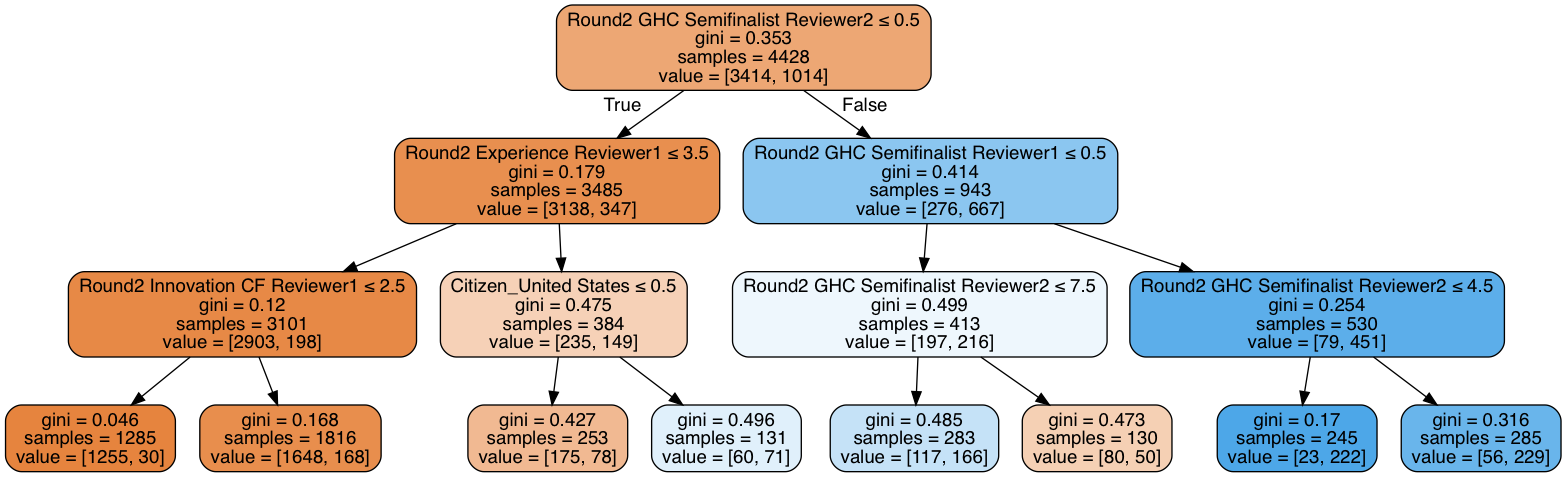

In [30]:
# visualize the decision tree
tree.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                    feature_names=X_train.columns,  
                    filled=True, rounded=True,  
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



Let's check out how ensemble methods like Random Forest behave in such setting....

In [31]:
# Random forest Classifier
rtree = RandomForestClassifier(max_depth=3, max_features=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(rtree, X_train, y_train, scoring='roc_auc', cv=kfold)
print '10-fold Area Under ROC Curve:'
print [x for x in cross_val_scores]
print '\nMean of Cross Validated Area Under ROC Curve values:'
print np.mean(cross_val_scores)
print '\nStd of Cross Validated Area Under ROC Curve values:'
print np.std(cross_val_scores)

10-fold Area Under ROC Curve:
[0.9242524394082468, 0.942356572258533, 0.9249611868207693, 0.9123484176279207, 0.9126134301270417, 0.9529038112522686, 0.9435185185185184, 0.9183665008291872, 0.9261922472931646, 0.9057922979797979]

Mean of Cross Validated Area Under ROC Curve values:
0.9263305422115448

Std of Cross Validated Area Under ROC Curve values:
0.014606560067695997


Quite an improvement in the mean area under roc curve from 0.82(in case to Decision trees) to 0.92(in case of Random forests). Let's check out extra trees classifier as well.

In [32]:
# Extra trees classifier
extratree =ExtraTreesClassifier(max_depth=3, max_features=10)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(extratree, X_train, y_train, scoring='roc_auc', cv=kfold)
print '10-fold Area Under ROC Curve:'
print [x for x in cross_val_scores]
print '\nMean of Cross Validated Area Under ROC Curve values:'
print np.mean(cross_val_scores)
print '\nStd of Cross Validated Area Under ROC Curve values:'
print np.std(cross_val_scores)

10-fold Area Under ROC Curve:
[0.9205382436260623, 0.9319431476294222, 0.9281524926686215, 0.9191659272404613, 0.9197217180883241, 0.8991681790683604, 0.940326147042565, 0.9109867330016583, 0.9221974267845827, 0.8770359848484849]

Mean of Cross Validated Area Under ROC Curve values:
0.9169235999998543

Std of Cross Validated Area Under ROC Curve values:
0.017013564141922732


From the above results of 10 fold cross validation we can observe that extra trees classifier gives almost similar performance. Let's check out a boosting method like Adaboost classifier.....

In [33]:
# Adaboost Classifier
adatree = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(adatree, X_train, y_train, scoring='roc_auc', cv=kfold)
print '10-fold Area Under ROC Curve:'
print [x for x in cross_val_scores]
print '\nMean of Cross Validated Area Under ROC Curve values:'
print np.mean(cross_val_scores)
print '\nStd of Cross Validated Area Under ROC Curve values:'
print np.std(cross_val_scores)

10-fold Area Under ROC Curve:
[0.9402895813660685, 0.9416433239962652, 0.9410902190788338, 0.9165039929015084, 0.9331669691470055, 0.9557168784029038, 0.9430071862907684, 0.9367606412382532, 0.9433699754800673, 0.9347537878787879]

Mean of Cross Validated Area Under ROC Curve values:
0.9386302555780462

Std of Cross Validated Area Under ROC Curve values:
0.009430800436988877


Well!! It is worth noticing the improvement in the area under roc curve values. Adaboost gives a mean value of 0.93. Let's go ahead and fit the different models with a range of parameters using grid search to figure out the best classifier that gives the highest area under roc curve. 

In [34]:
# GridSearch to see if optimizing the parameters will improve the area under roc curve 
classifiers = [('DecTreeClf', DecisionTreeClassifier(), {'max_depth': range(2, 10, 2), 'max_features': [0.25, 0.5, 0.75, 1.0]}),
              ('RandomForestClf',RandomForestClassifier(),{'max_depth':range(2,10,2),'n_estimators':range(10,80,10),'max_features':[0.25, 0.5, 0.75, 1.0]}),
('ExtraTreeClf', ExtraTreesClassifier(),{'max_depth':range(2,10,2),'n_estimators':range(10,80,10),'max_features':[0.25, 0.5, 0.75, 1.0]}),
('AdaBoost', AdaBoostClassifier(),{'n_estimators':range(10,80,10), 'learning_rate':[0.001,0.01,0.1,1]})]

names = []
params = []
results = []

for name, model, param in classifiers:
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    clf_grid = GridSearchCV(model, param, cv=kfold, scoring='roc_auc')
    clf_grid.fit(X_train, y_train)
    # just keep the results using the best parameters
    best_model = clf_grid.best_estimator_
    names.append(name)
    params.append(clf_grid.best_params_)
    results.append(clf_grid.best_score_)  

result_df = pd.DataFrame({'models': names, 'results': results})
result_df.columns = ['models', 'Area Under ROC Curve']
result_df.sort_values(by='Area Under ROC Curve', ascending=False, inplace=True)
print result_df
              

            models  Area Under ROC Curve
2     ExtraTreeClf              0.942963
1  RandomForestClf              0.942889
3         AdaBoost              0.940297
0       DecTreeClf              0.931330


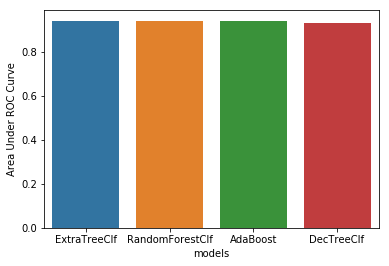

In [38]:
# Visualize the performance of the above fitted models
sns.barplot(x='models',y='Area Under ROC Curve',data=result_df)

From the above results it is clear that there is not much difference in the performance of various classifiers on this dataset. The highest area under roc curve was obtained with ExtratreesClassifier. Area under Roc curve provides the goodness of fit of the model. An area below 0.5 is a worthless model. A value of 0.5 is neutral. With increase in the area above 0.5, the goodness of the fit of the model increases....

In [42]:
# best parameters for the above models 
params

[{'max_depth': 4, 'max_features': 0.75},
 {'max_depth': 6, 'max_features': 0.5, 'n_estimators': 30},
 {'max_depth': 8, 'max_features': 0.25, 'n_estimators': 70},
 {'learning_rate': 0.1, 'n_estimators': 70}]

As it is clear that extratrees classifier gives the best results with max depth of 8, 25% of the features and with 70 trees in the ensemble. Let's see if we can optimize this model further....

In [46]:
# Hyper parameter tuning to optimize extra tree classifier model

# parameters
param =[{'max_depth':range(10,20,2),'n_estimators':range(80,200,10),'max_features':[0.25, 0.5, 0.75, 1.0]}]
model = ExtraTreesClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
clf_grid = GridSearchCV(model, param, cv=kfold, scoring='roc_auc') #GridsearchCV
# fit the model
clf_grid.fit(X_train,y_train)

# best model , best parameters, and best score
best_model = clf_grid.best_estimator_
best_parameters = clf_grid.best_params_
best_score = clf_grid.best_score_

In [48]:
print "The Best model :", best_model
print "The Best parameters for the model :", best_parameters
print "The Best mean Area Under ROC Curve score : ", best_score

The Best model : ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=10, max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
The Best parameters for the model : {'max_features': 0.25, 'n_estimators': 170, 'max_depth': 10}
The Best mean Area Under ROC Curve score :  0.9429865850209619


From the above results, it becomes clear that the performance of the extra trees model is not improving further with are under roc curve value at 0.9429. Let's calculate the feature importance of the different variables used in the model.

In [49]:
#Collect the feature importances in a pandas dataframe
feature_importance = best_model.feature_importances_
attribs = X_train.columns
temp=pd.DataFrame(sorted(zip(feature_importance, attribs), reverse=True))
temp.columns =['importance','feature']

In [50]:
temp

,importance,feature
0,0.268235,Round2 Is this applicant moving on as a GHC Se...
1,0.209479,Round2 Is this applicant moving on as a GHC Se...
2,0.074992,Round2 GHC Semifinalist Reviewer2
3,0.066611,Round2 GHC Semifinalist Reviewer1
4,0.032620,Round2 Experience Reviewer1
5,0.029416,Round2 Experience Reviewer2
6,0.017108,Round2 Total Score Reviewer1
7,0.014138,Round2 Clear Purpose CF Reviewer2
8,0.014137,Round2 Total Score Reviewer2
9,0.013700,Round2 Innovation CF Reviewer2


As mentioned earlier, GHC's selection process consists of five rounds of interviews. But we are interested in analyzing Round2 and Round3 of the process.

The selection of candidates as semi-finalists is made in round 3 in which round 3 reviewer reads all the applications for a specific position, reconciles any discrepency between the two reviewers in round 2 and gives the final decision of whether the candidate should move to semi-finals or not.

From the above results it becomes clear that Round2 Reviewers opinion about candidates profile really play a significant role in a candidate's selection as a semifinalist.

The features importances generated by the final model makes it very clear that both Reviewer1 and Reviewer2's decision on whether the applicant should move to semifinal round is extremely important.Other very important features to consider are:
+ whether the applicant demonstrates past experience in that specific position.
+ whether the applicant demonstrates clear sense of purpose for joining GHC community.
+ innovativeness of the applicant.
+ whether the applicant has the potential to inspire and mobilize other i.e his leadership skills.
+ whether the applicant demonstrates any commitment to social justice.
+ whether the applicant demonstrates any value of collaboration i.e will he/she prove to be a good team player etc...


### Discussion and Final Thoughts :


In this part of the project, Decision Trees and ensemble methods like Random Forests, AdaBoost and Extra Trees Classifier were used to perform the binary classification task of predicting the semi-finalist outcome of applicants(yes/no) i.e whether an individual applicant qualifies as a semi-finalist or not.

The features importance generated by the optimized model gave a very clear picture of important factors affecting the selection process. This information will be used as a feature selection technique for this project. 

Since the final model gave the best results with 25% of the features, the same will be used to fit an artificial neural network to perform the final binary classification task in the next part of this project in People'sAnalytics-NeuralNets notebook.

